In [1]:
library(R2jags)
library(coda)
library(lattice)
library(MCMCvis)

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




In [13]:
# question 1
jags.mod <- function(){
    s ~ dgamma(0.001,0.001)
    b0 ~ dnorm(0,1/100000)
    b1 ~ dnorm(0,1/100000)
    b2 ~ dnorm(0,1/100000)
    b3 ~ dnorm(0,1/100000)

    for(i in 1:20){
        mu[i] <- b0+ b1*(LeftG[i]-mean(LeftG[]))+
        b2*(LabF[i]-mean(LabF[]))+b3*(IndC[i]-mean(IndC[]))

        mod[i] ~ dnorm(mu[i],s)
    }
}

dat <- c(82.4,8.28,111.84,1.55,80.0,6.90,73.17,1.71,
74.2,4.39,17.25,2.06,73.3,7.62,59.33,1.56,
71.9,8.12,43.25,1.52,69.8,7.71,90.24,1.52,
68.1,6.79,0.00,1.75,65.6,7.81,48.67,1.53,
59.4,6.96,60.00,1.64,58.9,7.41,83.08,1.58,
51.4,8.60,33.74,1.37,50.6,9.67,0.00,0.86,
48.0,10.16,43.67,1.13,39.6,10.04,35.33,0.92,
37.7,8.41,31.50,1.25,35.4,7.81,11.87,1.68,
31.2,9.26,0.00,1.35,31.0,10.59,1.92,1.11,
28.2,9.84,8.67,0.95,24.5,11.44,0.00,1.00)

dat <-matrix(dat,nrow=20,ncol=4,byrow=TRUE)
mod <- dat[,1]
LabF <- dat[,2]
LeftG <- dat[,3]
IndC <- dat[,4]

jags.data <- list('mod','LabF','LeftG','IndC')
jags.param <- c('b0','b1','b2','b3')
inits1 <- list('s' = 100, 'b0' = 20,'b1'=10,'b2'=-5,'b3'=-25)
inits2 <- list('s'=100000,'b0'=-100,'b1'=100,'b2'=-100,'b3'=500)
jags.inits <- list(inits1, inits2)

jags.mod.fit <- jags(data = jags.data, inits = jags.inits,
parameters.to.save = jags.param, n.chains = 2, n.iter = 6000,
n.burnin = 500,n.thin=1,model.file = jags.mod,DIC=FALSE)



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 5
   Total graph size: 226

Initializing model



In [14]:
print(jags.mod.fit)

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpyCyOYz/model420076735e9e.txt", fit using jags,
 2 chains, each with 6000 iterations (first 500 discarded)
 n.sims = 11000 iterations saved
   mu.vect sd.vect    2.5%     25%    50%    75%  97.5%  Rhat n.eff
b0  54.051   2.494  49.134  52.464 54.057 55.577 58.988 1.001 11000
b1   0.268   0.309   0.107   0.218  0.271  0.323  0.431 1.258 11000
b2  -6.410   4.879 -14.168  -8.973 -6.397 -3.819  1.593 1.045 11000
b3   0.586  20.912 -39.101 -12.553  0.625 13.773 41.317 1.001 11000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).


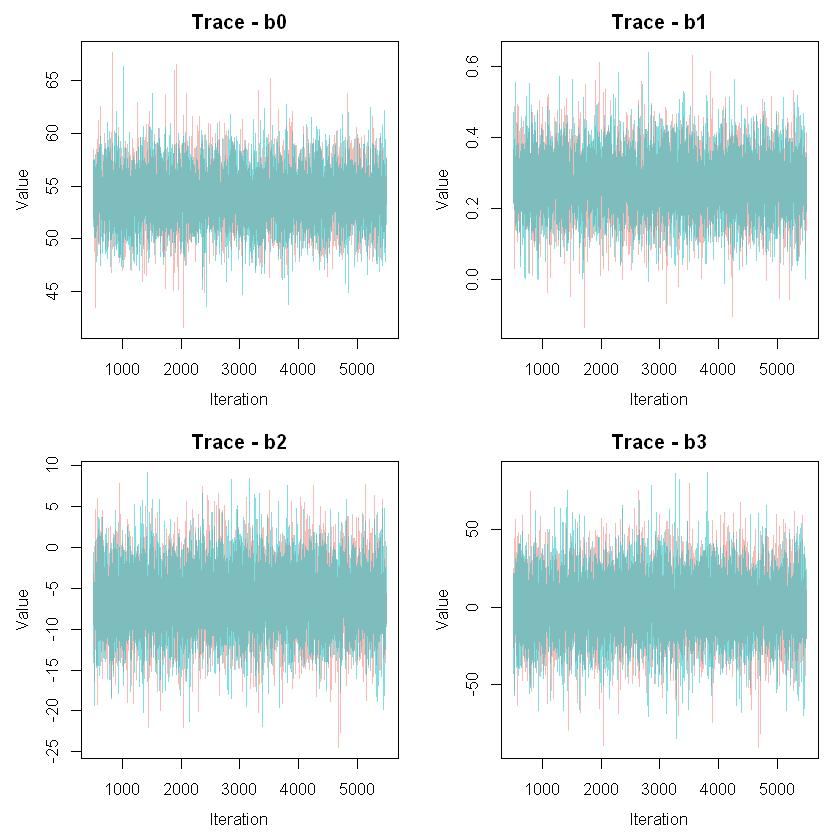

In [15]:
jagsfit.mcmc <- as.mcmc(jags.mod.fit)
MCMCtrace(jagsfit.mcmc,type = 'trace',ind = TRUE, pdf = FALSE)

In [16]:
gelman.diag(jagsfit.mcmc)

Potential scale reduction factors:

   Point est. Upper C.I.
b0          1          1
b1          1          1
b2          1          1
b3          1          1

Multivariate psrf

1